In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
np.random.seed(42)

In [3]:
x = np.linspace(0, 10, 100)
y = 3 * x + 4 + np.random.normal(0, 5, x.shape[0])

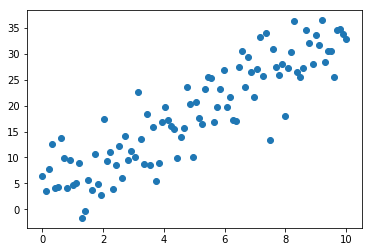

In [4]:
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

In [5]:
m = np.random.rand()
c = np.random.rand()

In [6]:
def f(x, m, c):
    return m*x + c

In [7]:
reg_y = f(x, m, c)

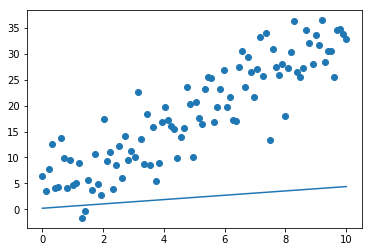

In [8]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, reg_y)
plt.show()

version 1

In [9]:
# least square
mu_x = np.mean(x)
mu_y = np.mean(y)

m = np.sum((x-mu_x)*(y-mu_y)) / np.sum(np.power(x-mu_x, 2))
c = mu_y - m*mu_x

In [10]:
print(m)
print(c)

3.068966336683283
3.135935729613113


In [11]:
reg_y = f(x, m, c)

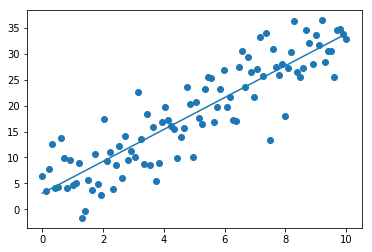

In [12]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, reg_y)
plt.show()

version 2

In [13]:
x_1 = x.reshape(-1, 1)
x_2 = np.full(x.shape, 1).reshape(-1, 1)
xx = np.hstack([x_1, x_2])
m = np.dot(np.dot(np.linalg.inv(np.dot(xx.T, xx)), xx.T), y)

In [14]:
m

array([3.06896634, 3.13593573])

In [15]:
reg_y = f(x, m[0], m[1])

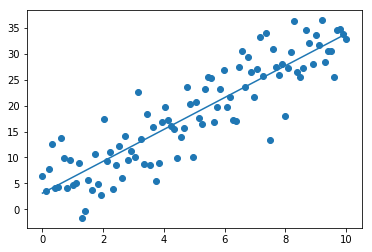

In [16]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, reg_y)
plt.show()

version 3

In [17]:
x_1 = x.reshape(-1, 1)
x_2 = np.full(x.shape, 1).reshape(-1, 1)
xx = np.hstack([x_1, x_2])
m, c = np.linalg.lstsq(xx, y, rcond=None)[0]

In [18]:
display(m)
c

3.068966336683283

3.135935729613115

In [19]:
reg_y = f(x, m, c)

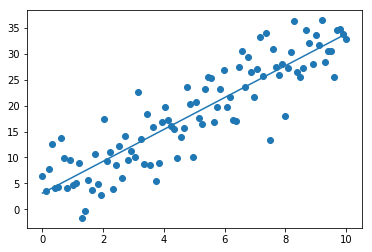

In [20]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, reg_y)
plt.show()

version 4

In [35]:
xx = x.reshape(-1, 1)
model = LinearRegression().fit(xx, y)

In [39]:
display(model.coef_[0])
model.intercept_

3.0689663366832827

3.1359357296131165

In [37]:
reg_y = model.predict(xx)

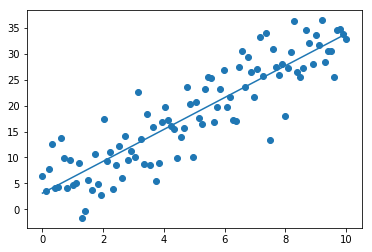

In [38]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, reg_y)
plt.show()